# 1. Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the dataset

## 2.1 Reading the dataset

In [4]:
df = pd.read_csv('data/SeoulBikeData.csv', encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2.2 Shape of the dataset

In [5]:
df.shape

(8760, 14)

## 2.3 Checking for duplicate values

In [6]:
df.duplicated().sum()

0

## 2.4 Checking for missing values

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## 2.5 Columns description

The dataset is clean with no null values and not duplicate values



The dataset contains the following variables:

* Date: The date of the observation.

* Hour: The hour of the observation.

* Temperature: The temperature at the time of the observation.

* Hour of the day: The hour of the day on a scale of 0 to 23.

* Humidity: The humidity at the time of the observation in %.

* Windspeed: The windspeed at the time of the observation in m/s.

* Visibility: The visibility at the time of the observation in 10m.

* Dew Point Temperature: The dew point temperature at the time of the observation in °C.

* Solar Radiation: The solar radiation at the time of the observation in MJ/m2.

* Rainfall: The amount of rainfall at the time of the observation, measured in mm.

* Snowfall: The amount of snowfall at the time of the observation, measured in cm.

* Seasons: The season at the time of the observation.

* Holiday: A binary variable indicating whether the observation occurred on a holiday or not.

* Functional Day: A binary variable indicating whether the observation was a functional day or not.

## 2.6 Converting the date column into separate ones

In [8]:
# Converting the 'date' column into separate ones - 'Day', 'Month', and 'Day of the Week'
import datetime as dt
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day of the week'] = df['date'].dt.day_name()

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date,Month,Day,Day of the week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday


# 3. Exploratory Data Analysis

## 3.1 Count of Rented Bikes month wise

In [10]:
# Pivot Table showing the variation of count of rented bikes monthwise
bike_month = pd.pivot_table(df,values='Rented Bike Count', index='Month', aggfunc='sum')
bike_month

,Rented Bike Count
Month,
1,150006
2,151833
3,380594
4,524227
5,707088
6,896887
7,734460
8,651887
9,673612


[Text(0, 200000, '200K'),
 Text(0, 400000, '400K'),
 Text(0, 600000, '600K'),
 Text(0, 800000, '800K')]

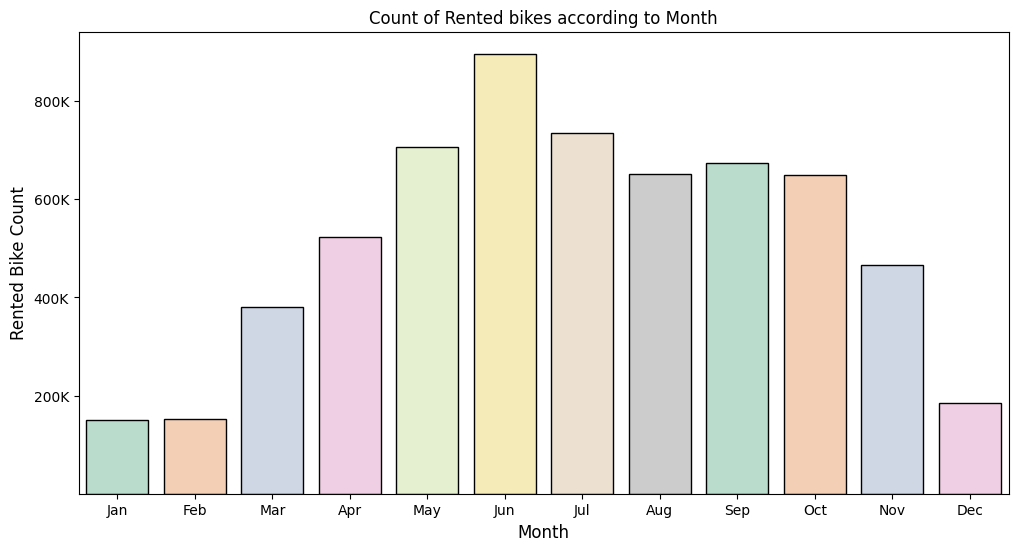

In [11]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(12, 6))

#Changing the colors of the bars
color = sns.color_palette('Pastel2')

sns.barplot(data=bike_month, x=list(bike_month.index), y='Rented Bike Count', palette=color, edgecolor='black', errorbar=None)
ax.set(title='Count of Rented bikes according to Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Setting the axes titles
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Rented Bike Count', fontsize=12)

# Changing y-tick labels
ytick_labels = ['200K', '400K', '600K', '800K']
ytick_values = [200000, 400000, 600000, 800000]
ax.set_yticks(ytick_values)
ax.set_yticklabels(ytick_labels)
     

The lowest bike rental counts were observed during the winter months (December to February), while the highest counts were in June. This highlights a clear seasonal trend, with demand peaking during the warmer summer months.

## 3.2 Weekly variation in rented bikes

In [14]:
# Pivoting the dataframe
bike_day = pd.pivot_table(df, values='Rented Bike Count', index='Day of the week', aggfunc='sum')

# Defining the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordering the index labels
bike_day = bike_day.reindex(weekday_order)
bike_day

,Rented Bike Count
Day of the week,
Monday,911743
Tuesday,858596
Wednesday,923956
Thursday,861999
Friday,950334
Saturday,885492
Sunday,780194


[Text(0, 200000, '200K'),
 Text(0, 400000, '400K'),
 Text(0, 600000, '600K'),
 Text(0, 800000, '800K')]

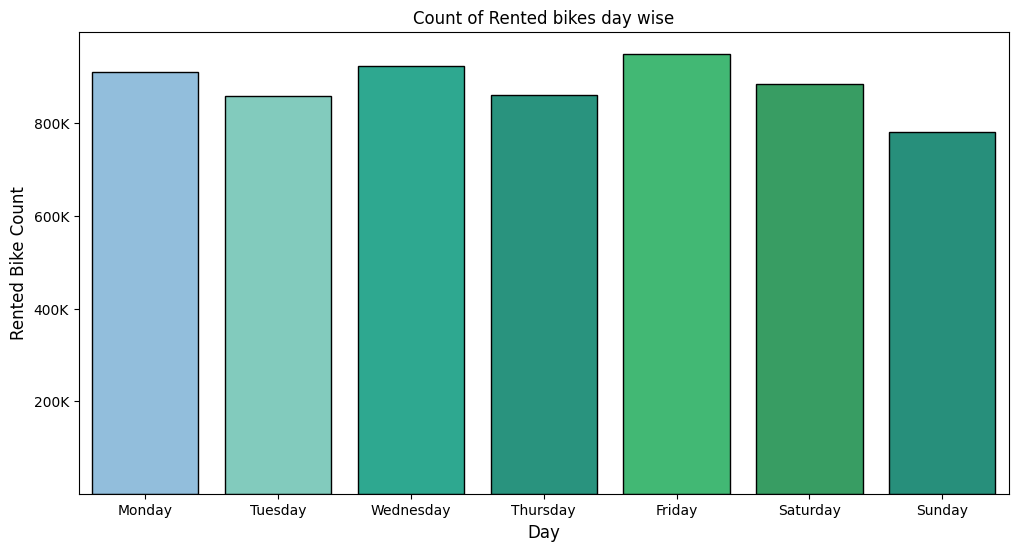

In [15]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(12, 6))

# Changing the colors of the bars
colors = ['#85c1e9', '#76d7c4','#1abc9c', '#17a589','#2ecc71', '#27ae60', '#16a085']

sns.barplot(data=bike_day, x=list(bike_day.index), y='Rented Bike Count',palette=colors, edgecolor='black', errorbar=None)
ax.set(title='Count of Rented bikes day wise')

# Setting the axes titles
ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Rented Bike Count', fontsize=12)

# Changing y-tick labels
ytick_labels = ['200K', '400K', '600K', '800K']
ytick_values = [200000, 400000, 600000, 800000]
ax.set_yticks(ytick_values)
ax.set_yticklabels(ytick_labels)

Analyzing the day-wise variation in rented bikes showed consistent counts from Monday to Friday, with a slight dip on weekends. This suggests a potential relationship between bike availability and weekday versus weekend demand. Remarkably, the minimal variation between the highest and lowest bike rentals throughout the week indicates stable demand patterns, aiding effective planning for rental bike providers.

## 3.3 Hourly Fluctuations in Bike Rentals

In [16]:
# Pivoting the dataframe
bike_hour = pd.pivot_table(df, values='Rented Bike Count', index='Hour', aggfunc='sum')
bike_hour.head()

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396


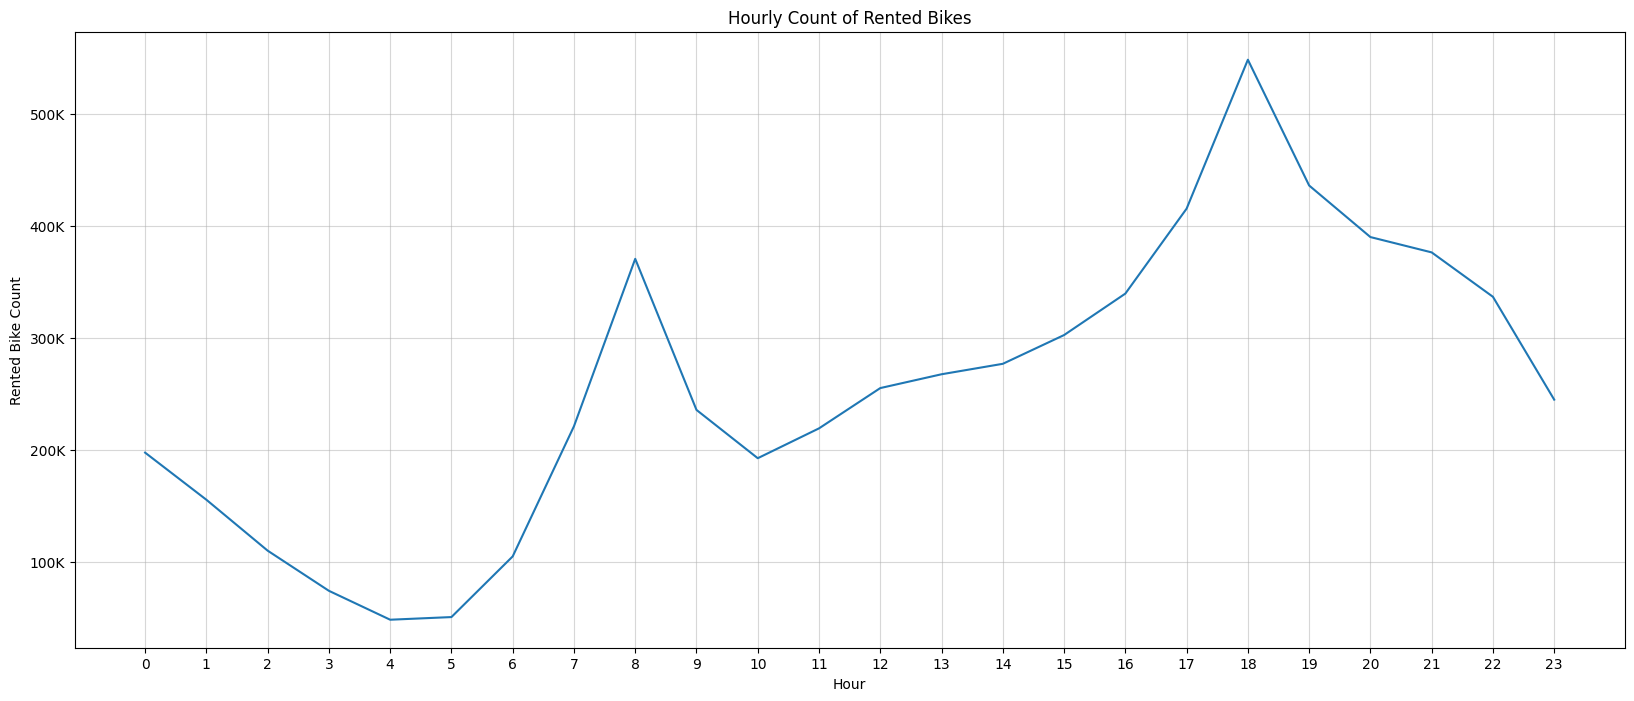

In [17]:
# Visualizing the table

bike_hour.plot(figsize=(20, 8), legend=None)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hourly Count of Rented Bikes')
plt.yticks([100000, 200000, 300000, 400000, 500000], ['100K', '200K', '300K', '400K', '500K'])
plt.grid(alpha=0.5)
plt.show()

There are two peaks in the hourly count of rented bikes, one at 8 am and one at 6 pm, which may be due to office goers. The minimum count of rented bikes occurs at 4 am, while the maximum count occurs at 6 pm. These insights suggest that there are specific times of the day when the demand for rented bikes is higher, and that this demand is likely driven by people's work schedules.

## 3.4 Seasonal Variation in rented bikes

In [18]:
# Pivoting the dataframe
bike_season = pd.pivot_table(df, values='Rented Bike Count', index='Seasons', aggfunc='sum')
bike_season.head()

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


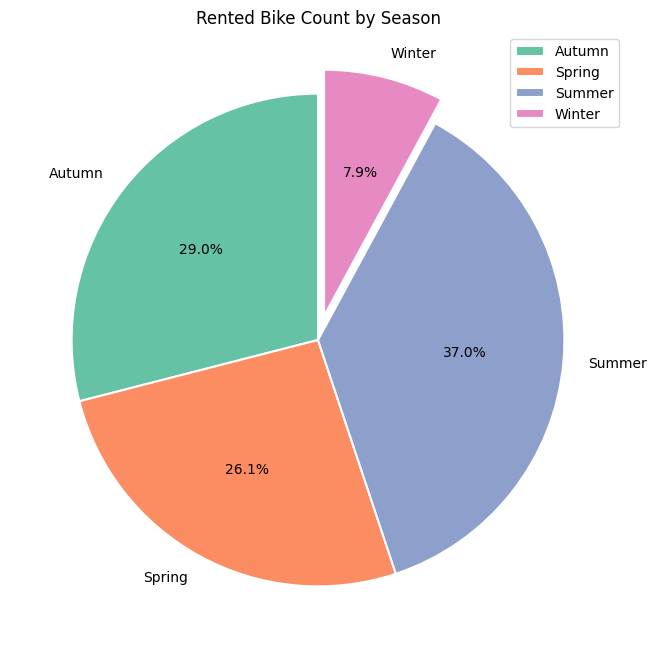

In [25]:
colors = sns.color_palette('Set2')

# Creating a pie chart
bike_season.plot(kind='pie', y='Rented Bike Count', labels=bike_season.index, colors=colors, autopct='%1.1f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, startangle=90, figsize=(20,8), explode=[0, 0, 0, 0.1])

# Adding a title to the pie chart
plt.title('Rented Bike Count by Season')

# Removing the y-label
plt.ylabel('')

# Displaying the pie chart
plt.show()

From the pie chart, we can see that summer has the highest percentage of rented bikes, accounting for over 37% of the total count. Autumn is the second highest with 29%, followed by spring with 26%. Winter has the lowest percentage of rented bikes, accounting for only 7.9% of the total count. This suggests that the demand for rented bikes is highest during the summer season, which could be due to various reasons such as pleasant weather and summer vacations. Conversely, the low demand for rented bikes during the winter season could be attributed to colder temperatures and less favorable weather conditions. 

## 3.5 Histogram showing rented bikes vs Temperature

In [26]:
bike_temp = pd.pivot_table(df, values='Rented Bike Count', index='Temperature(°C)', aggfunc='sum')
bike_temp

,Rented Bike Count
Temperature(°C),
-17.8,322
-17.5,291
-17.4,64
-16.9,36
-16.5,96
...,...
38.0,1184
38.7,475
39.0,1033


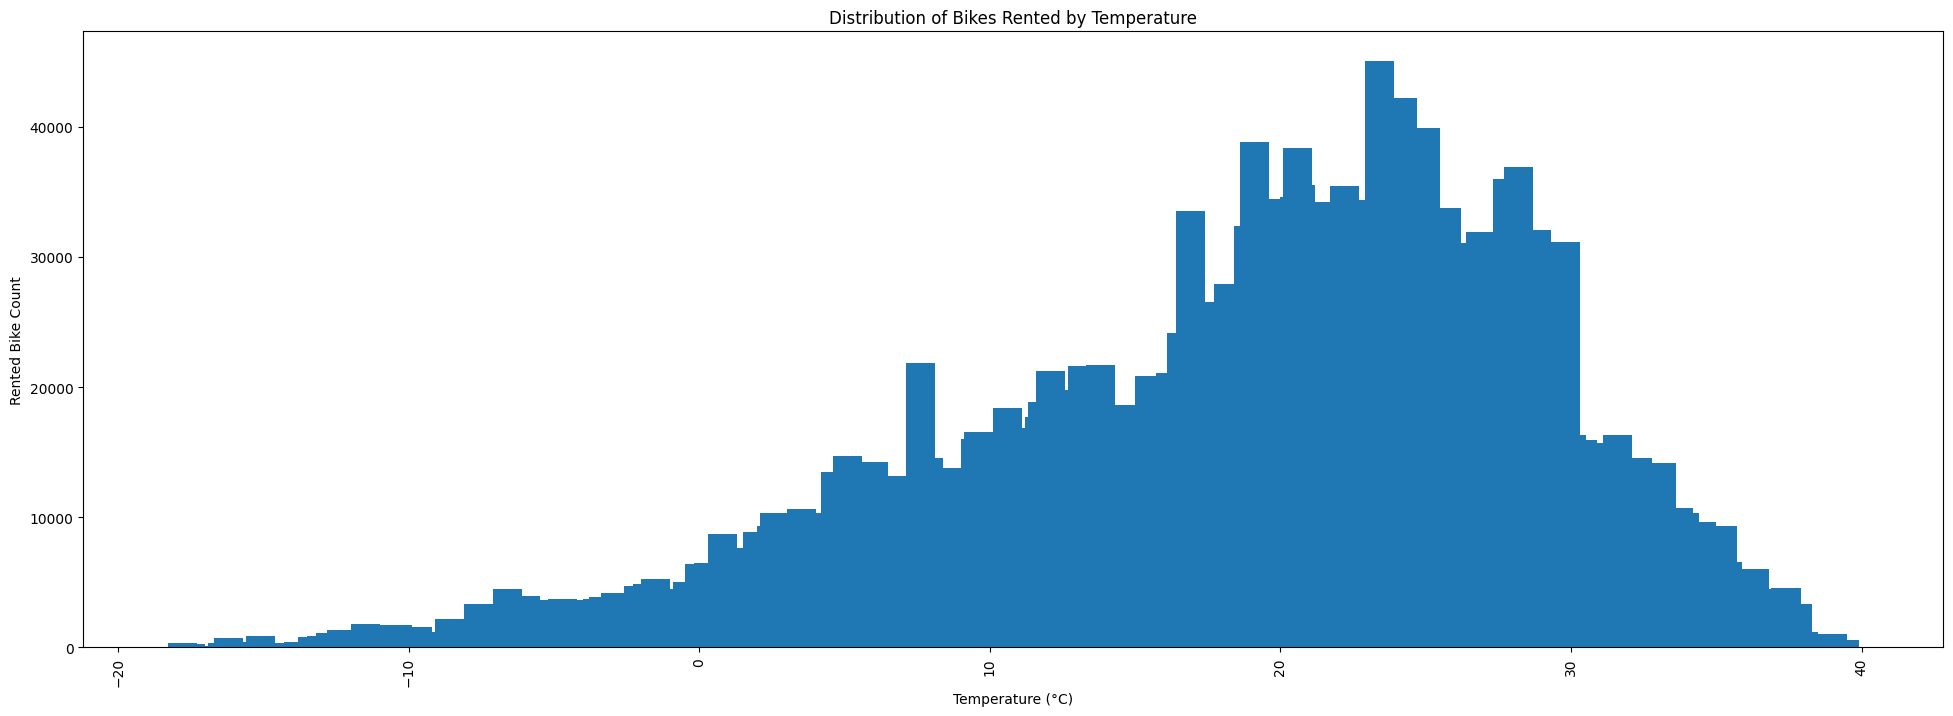

In [27]:
# Setting figure size
fig, ax = plt.subplots(figsize=(24, 8))
ax.bar(bike_temp.index, bike_temp['Rented Bike Count'], width=1)

# Adding labels and title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Rented Bike Count')
ax.set_title('Distribution of Bikes Rented by Temperature')

# Rotating x-axis labels
ax.tick_params(axis='x', labelrotation=90)

# Displaying the plot
plt.show()

The minimum number of bikes rented occurred at extreme temperatures of -20°C and 40°C. This indicates that weather conditions that are too cold or too hot may not be conducive to biking and can result in a lower demand for rented bikes.

There is a general upward trend in the number of bikes rented as the temperature increases, reaching a peak at around 25°C. This suggests that mild temperatures are the most favorable for bike rentals, and as the temperature gets too hot or too cold, the demand for rented bikes decreases.

Overall, the histogram shows that temperature has a significant impact on the demand for rented bikes, with mild temperatures being the most favorable for bike rentals.

## 3.6 Daily variation in rented bikes

In [28]:
bike_daily = pd.pivot_table(df, values='Rented Bike Count', index='Day', aggfunc='sum')
bike_daily.head()

,Rented Bike Count
Day,
1,201300
2,165973
3,192256
4,202423
5,193881


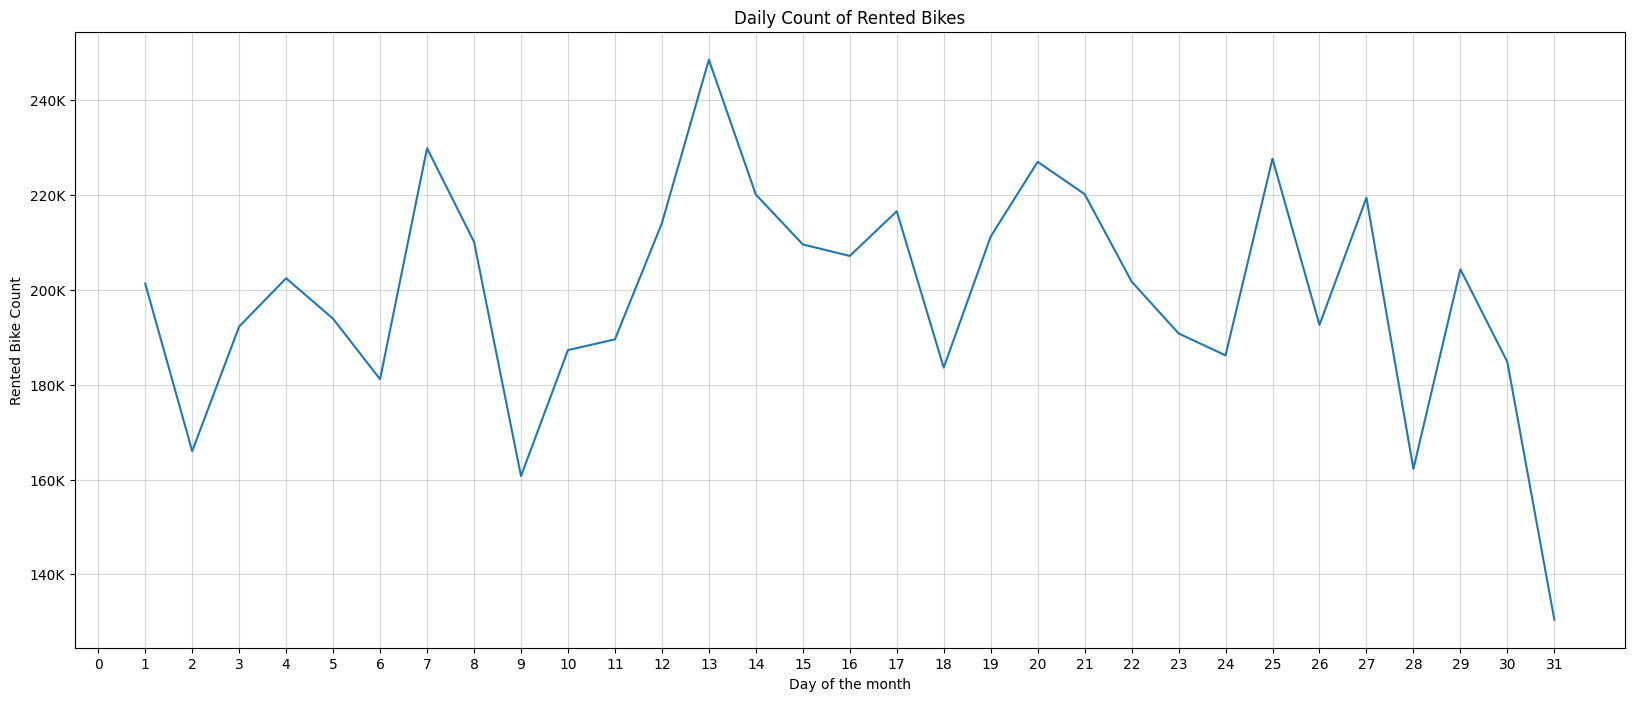

In [29]:
bike_daily.plot(figsize=(20, 8), legend=None)
plt.xticks(range(32))
plt.xlabel('Day of the month')
plt.ylabel('Rented Bike Count')
plt.title('Daily Count of Rented Bikes')
plt.yticks([140000, 160000, 180000, 200000, 220000, 240000], ['140K', '160K', '180K', '200K', '220K', '240K'])
plt.grid(alpha=0.5)
plt.show()

From the line chart, we can see peaks in the number of rented bikes almost after every 7 days with the maximum at the middle of the month, and minimum at the later parts of the month.